<a href="https://colab.research.google.com/github/Lukec-lehighu/CSE337-Labs/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [ ]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 7.0 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.54e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 69        |
|    time_elapsed    | 11        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 23.4      |
|    critic_loss     | 0.262     |
|    ent_coef        | 0.812     |
|    ent_coef_loss   | -0.342    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.55e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 66        |
|    time_elapsed    | 24        |
|    total_timesteps | 1600   

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [ ]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 24.4 MB/s eta 0:00:00


In [31]:
from stable_baselines3.common.callbacks import BaseCallback

class RewardLogger(BaseCallback):
  def __init__(self, verbose: int = 0):
    super().__init__(verbose)
    self.total_reward = 0
    self.rewards = []
  def _on_step(self) -> bool:
    if self.locals['dones'][0]:
      self.rewards.append(self.total_reward)
      self.total_reward = 0
    else:
      self.total_reward += self.locals['rewards'][0]
    return True


In [32]:
import gymnasium as gym
from stable_baselines3 import SAC
from stable_baselines3.common.logger import configure
from stable_baselines3.common.callbacks import EvalCallback

# Create environment
env = gym.make("HalfCheetah-v5")

# eval callback
eval_callback = EvalCallback(env, log_path="tmpLog/")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# custom logger
rewardLogger = RewardLogger(verbose=1)

# Train the agent with N time steps
N = 80000
model.learn(total_timesteps=N, callback=rewardLogger)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -242     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 65       |
|    time_elapsed    | 60       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -32.8    |
|    critic_loss     | 1.15     |
|    ent_coef        | 0.313    |
|    ent_coef_loss   | -10.9    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -245     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 63       |
|    time_elapsed    | 126      |
|    total_timesteps | 8000     |
| train/             

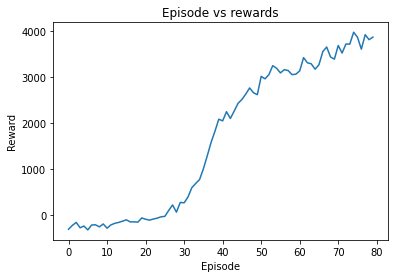

In [33]:
# plot rewards vs episodes
plt.plot(rewardLogger.rewards)
plt.title('Episode vs rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [35]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("HalfCheetah-v5", render_mode="rgb_array")

N_steps = 1000

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())

# Questions

Did SAC reach a higher average reward or converge faster than your previous method?

- SAC was able to reach a much higher average reward and converged faster than previous methods.

How did changing the temperature for entropy affect the performance and stability of learning?

- Increasing the temperature for entropy makes the model explore more possible random states, meaning it will have a higher chance of discovering the optimal action for a given state, but will take longer to converge since it's less stable during training.

Describe any differences you observed in exploration or motion behavior of the agent.

- Compared to previous methods, the agent explored more, but its motion is much more confined and less sparatic. It doesn't flop around as much and instead sticks to a singular movement that it repeats over and over to maximize reward.